#  Taylor problem 5.32

last revised: 12-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]


**Replace ### by appropriate expressions.**

The equation for an underdamped oscillator, such as a mass on the end of a spring, takes the form 

$\begin{align}
  x(t) = e^{-\beta t} [B_1 \cos(\omega_1 t) + B_2 \sin(\omega_1 t)]
\end{align}$

where

$\begin{align}
  \omega_1 = \sqrt{\omega_0^2 - \beta^2}
\end{align}$

and the mass is released from rest at position $x_0$ at $t=0$.


**Goal: plot $x(t)$ for $0 \leq t \leq 20$, with $x_0 = 1$, $\omega_0=1$, and $\beta = 0.$, 0.02, 0.1, 0.3, and 1.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def underdamped(t, betas, omega_0=1, x_0=1):
    """Solution x(t) for an underdamped harmonic oscillator."""
    omega_1 = np.sqrt(omega_0**2 - betas**2)
    B_1 = x
    B_2 = 5
    return np.exp(-betas*t) \
             * ( B_1 * np.cos(omega_1*t) + B_2 * np.sin(omega_1*t) )

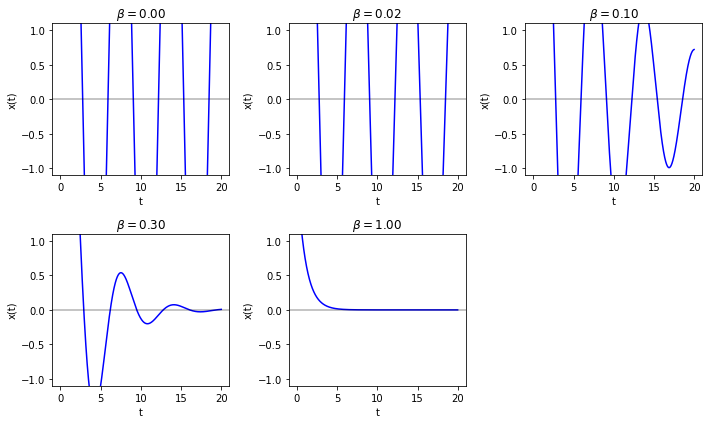

In [3]:
t_pts = np.arange(0., 20., .01)
betas = [0., 0.02, 0.1, 0.3, 0.9999]

fig = plt.figure(figsize=(10,6))
# look up "python enumerate" to find out how this works!
for i, beta in enumerate(betas):
    ax = fig.add_subplot(2, 3, i+1)
    ax.plot(t_pts, underdamped(t_pts, beta), color='blue') 
    ax.set_title(rf'$\beta = {beta:.2f}$')
    ax.set_xlabel('t')
    ax.set_ylabel('x(t)')
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0., color='black', alpha=0.3)  # lightened black zero line
    
fig.tight_layout()
plt.show()

## Bonus: Widgetized!

In [4]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

omega_0 = 1.

def plot_beta(beta):
    """Plot function for underdamped harmonic oscillator."""
    t_pts = np.arange(0., 20., .01)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(t_pts, underdamped(t_pts, beta), color='blue') 
    ax.set_title(rf'$\beta = {beta:.2f}$')
    ax.set_xlabel('t')
    ax.set_ylabel('x(t)')
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0., color='black', alpha=0.3)
    
    fig.tight_layout()
 
max_value = omega_0 - 0.0001
interact(plot_beta, 
         beta=widgets.FloatSlider(min=0., max=max_value, step=0.01,
                                  value=0., readout_format='.2f',
                                  continuous_update=False));
    

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='beta', max=0.9999, step=0.0…

Now let's allow for complex numbers!  This will enable us to take $\beta > \omega_0$.

In [7]:
# numpy.lib.scimath version of sqrt handles complex numbers.
#  numpy exp, cos, and sin already can.
import numpy.lib.scimath as smath

def all_beta(t, beta, omega_0=1, x_0=1):
    """Solution x(t) for damped harmonic oscillator, allowing for overdamped
        as well as underdamped solution.
    """
    omega_1 = smath.sqrt(omega_0**2 - beta**2)
    return np.real( x_0 * np.exp(-beta*t) \
               * (np.cos(omega_1*t) + (beta/omega_1)*np.sin(omega_1*t)) )

In [8]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

omega_0 = 1.

def plot_all_beta(beta):
    """Plot of x(t) for damped harmonic oscillator, allowing for overdamped
       as well as underdamped cases."""
    t_pts = np.arange(0., 20., .01)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(t_pts, all_beta(t_pts, beta), color='blue') 
    ax.set_title(rf'$\beta = {beta:.2f}$')
    ax.set_xlabel('t')
    ax.set_ylabel('x(t)')
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0., color='black', alpha=0.3)
    
    fig.tight_layout()
 
interact(plot_all_beta, 
         beta=widgets.FloatSlider(min=0., max=2, step=0.01,
                                  value=0., readout_format='.2f',
                                  continuous_update=False));
    

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='beta', max=2.0, step=0.01),…

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def underdamped(t, betas, omega_0=1, x_0=1):
    """Solution x(t) for an underdamped harmonic oscillator."""
    omega_1 = np.sqrt(omega_0**2 - betas**2)
    B_1 = x_0
    B_2 = x_0*betas/omega_1
    return np.exp(-betas*t) \
             * ( B_1 * np.cos(omega_1*t) + B_2 * np.sin(omega_1*t) )

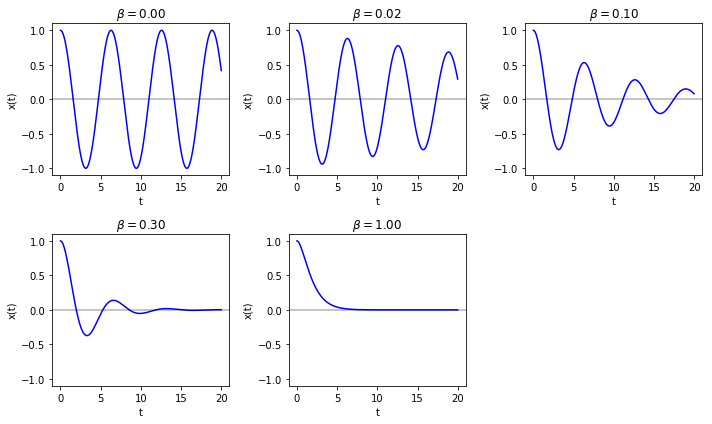

In [11]:
t_pts = np.arange(0., 20., .01)
betas = [0., 0.02, 0.1, 0.3, 0.9999]

fig = plt.figure(figsize=(10,6))
# look up "python enumerate" to find out how this works!
for i, beta in enumerate(betas):
    ax = fig.add_subplot(2, 3, i+1)
    ax.plot(t_pts, underdamped(t_pts, beta), color='blue') 
    ax.set_title(rf'$\beta = {beta:.2f}$')
    ax.set_xlabel('t')
    ax.set_ylabel('x(t)')
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0., color='black', alpha=0.3)  # lightened black zero line
    
fig.tight_layout()
plt.show()